Best MAPE: 0.8349486589431763 at epoch 11


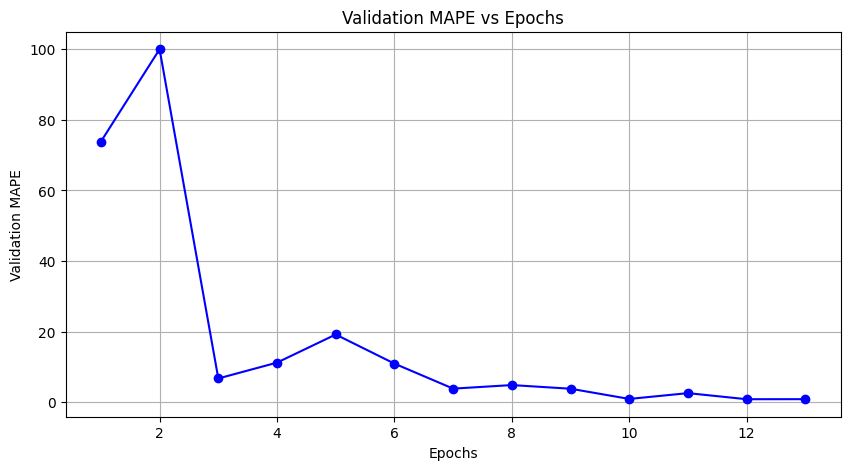

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the JSON file
with open('runs/wacv_2024_seed0/crop_yield/training_convlstm_debug/trainlog.json', 'r') as file:
    data = json.load(file)

# Extracting val_mape and epochs
epochs = list(map(int, data.keys()))
val_mape = [data[str(epoch)]['val_mape'] for epoch in epochs]

val_mape = [(mape) for mape in val_mape]
best_mape = min(val_mape)
print(f'Best MAPE: {best_mape} at epoch {val_mape.index(best_mape)}')
# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(epochs, val_mape, marker='o', linestyle='-', color='b')
plt.title('Validation MAPE vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation MAPE')
plt.grid(True)
plt.show()

In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
import glob

runs = glob.glob('runs/wacv_2024_seed0/crop_yield/*')
print(runs)

# # Load the data from the JSON file
# with open('runs/wacv_2024_seed0/crop_yield/0_1_debug/trainlog.json', 'r') as file:
#     data = json.load(file)

# # Extracting val_mape and epochs
# epochs = list(map(int, data.keys()))
# val_mape = [data[str(epoch)]['val_mape'] for epoch in epochs]

# val_mape = [np.log(mape) for mape in val_mape]

# # Plotting the data
# plt.figure(figsize=(10, 5))
# plt.plot(epochs, val_mape, marker='o', linestyle='-', color='b')
# plt.title('Validation MAPE vs Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Validation MAPE')
# plt.grid(True)
# plt.show()

['runs/wacv_2024_seed0/crop_yield/0_1_debug', 'runs/wacv_2024_seed0/crop_yield/after_concat_fusion_attn_0_debug', 'runs/wacv_2024_seed0/crop_yield/fusion_pixel_attn_0_debug', 'runs/wacv_2024_seed0/crop_yield/after_concat_fusion_attn_pixelwise_0_debug', 'runs/wacv_2024_seed0/crop_yield/after_concat_fusion_attn_pixelwise_0_debug_debug']
